In [60]:
from tensorflow import keras
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [61]:
word_index = reuters.get_word_index()
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = "".join([reversed_word_index.get(i-3, "?") for i in train_data[0]])

In [62]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [63]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [64]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [65]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [66]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [67]:
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(46, activation="softmax")
])

In [68]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [69]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [70]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20


2023-10-23 19:39:40.134518: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 319280000 exceeds 10% of free system memory.


16/16 [==============================] - 1s 39ms/step - loss: 2.8934 - accuracy: 0.4737 - val_loss: 1.9571 - val_accuracy: 0.6170
Epoch 2/20
16/16 [==============================] - 0s 27ms/step - loss: 1.6044 - accuracy: 0.6793 - val_loss: 1.4049 - val_accuracy: 0.6920
Epoch 3/20
16/16 [==============================] - 0s 25ms/step - loss: 1.1874 - accuracy: 0.7443 - val_loss: 1.2136 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 0s 26ms/step - loss: 0.9543 - accuracy: 0.7979 - val_loss: 1.0753 - val_accuracy: 0.7660
Epoch 5/20
16/16 [==============================] - 0s 26ms/step - loss: 0.7786 - accuracy: 0.8368 - val_loss: 1.0061 - val_accuracy: 0.7850
Epoch 6/20
16/16 [==============================] - 0s 26ms/step - loss: 0.6489 - accuracy: 0.8639 - val_loss: 0.9501 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 0s 25ms/step - loss: 0.5385 - accuracy: 0.8871 - val_loss: 0.9032 - val_accuracy: 0.8070
Epoch 8/20
16/16 [======

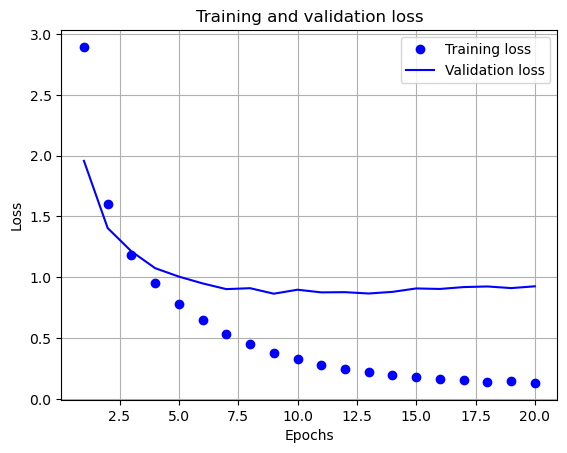

In [71]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

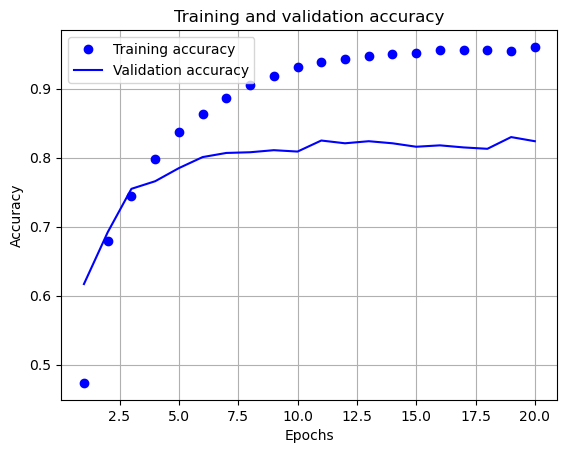

In [72]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [73]:
predictions  = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [74]:
predictions[0].shape

(46,)

In [75]:
np.sum(predictions[0])

0.9999998

In [76]:
np.argmax(predictions[0])

3

In [77]:
del y_train
del y_test

y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [78]:
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [79]:
del model

model = keras.Sequential([
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(46, activation="softmax")
])

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val)
)

Epoch 1/20
63/63 [==============================] - 1s 16ms/step - loss: 1.8008 - accuracy: 0.6069 - val_loss: 1.2611 - val_accuracy: 0.7210
Epoch 2/20
63/63 [==============================] - 1s 13ms/step - loss: 0.9964 - accuracy: 0.7795 - val_loss: 1.0205 - val_accuracy: 0.7880
Epoch 3/20
63/63 [==============================] - 1s 13ms/step - loss: 0.6760 - accuracy: 0.8530 - val_loss: 0.9721 - val_accuracy: 0.7970
Epoch 4/20
63/63 [==============================] - 1s 13ms/step - loss: 0.4633 - accuracy: 0.9032 - val_loss: 0.8628 - val_accuracy: 0.8230
Epoch 5/20
63/63 [==============================] - 1s 13ms/step - loss: 0.3346 - accuracy: 0.9277 - val_loss: 0.8746 - val_accuracy: 0.8140
Epoch 6/20
63/63 [==============================] - 1s 13ms/step - loss: 0.2581 - accuracy: 0.9411 - val_loss: 0.8979 - val_accuracy: 0.8150
Epoch 7/20
63/63 [==============================] - 1s 13ms/step - loss: 0.2125 - accuracy: 0.9493 - val_loss: 0.9465 - val_accuracy: 0.7990
Epoch 8/20
63